In [1]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
api_key = '36N2WM8I8W74IFZ0'

In [3]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='TSLA', interval = '1min', outputsize = 'full')
print(data)

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-04-15 20:00:00   738.34   738.34  738.25    738.25     2290.0
2021-04-15 19:59:00   738.34   738.34  738.34    738.34     2232.0
2021-04-15 19:58:00   738.33   738.34  738.25    738.34     2852.0
2021-04-15 19:57:00   738.15   738.32  738.15    738.30     3032.0
2021-04-15 19:56:00   738.20   738.20  738.20    738.20     1066.0
...                      ...      ...     ...       ...        ...
2021-04-05 04:05:00   696.09   696.09  693.57    693.57     5153.0
2021-04-05 04:04:00   700.10   700.54  696.00    697.11     9711.0
2021-04-05 04:03:00   700.00   702.00  700.00    700.54    12284.0
2021-04-05 04:02:00   701.60   703.00  700.03    700.03    11792.0
2021-04-05 04:01:00   700.00   702.00  688.00    700.05    27342.0

[6732 rows x 5 columns]


In [4]:
close_data = data['4. close']
close_data

date
2021-04-15 20:00:00    738.25
2021-04-15 19:59:00    738.34
2021-04-15 19:58:00    738.34
2021-04-15 19:57:00    738.30
2021-04-15 19:56:00    738.20
                        ...  
2021-04-05 04:05:00    693.57
2021-04-05 04:04:00    697.11
2021-04-05 04:03:00    700.54
2021-04-05 04:02:00    700.03
2021-04-05 04:01:00    700.05
Name: 4. close, Length: 6732, dtype: float64

In [5]:
x_train = np.array(close_data)
x_train

array([738.25, 738.34, 738.34, ..., 700.54, 700.03, 700.05])

In [10]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT', interval = '60min', outputsize = 'full')
close_data = data['4. close']
x_test = np.array(close_data)
x_test

array([259.35  , 259.13  , 259.1   , 259.    , 259.51  , 258.8   ,
       259.14  , 259.67  , 258.21  , 259.11  , 258.53  , 258.    ,
       257.65  , 257.5   , 257.1   , 257.4   , 255.38  , 255.91  ,
       255.99  , 255.95  , 255.81  , 255.515 , 255.85  , 256.835 ,
       256.87  , 257.59  , 257.98  , 258.55  , 259.45  , 259.5   ,
       259.63  , 259.32  , 258.22  , 258.08  , 258.41  , 258.5989,
       258.49  , 258.38  , 257.88  , 257.3509, 257.16  , 257.475 ,
       258.895 , 257.5   , 255.98  , 256.05  , 256.22  , 256.14  ,
       255.82  , 255.97  , 256.    , 255.95  , 255.92  , 256.0663,
       256.79  , 257.37  , 256.85  , 255.97  , 255.02  , 255.87  ,
       255.25  , 255.41  , 256.5   , 256.5   , 255.75  , 255.6   ,
       255.8   , 255.61  , 255.84  , 254.305 , 254.6533, 254.42  ,
       254.805 , 254.13  , 254.14  , 252.16  , 253.    , 252.99  ,
       252.67  , 253.    , 253.97  , 253.5   , 253.77  , 253.65  ,
       253.25  , 253.12  , 253.25  , 252.45  , 252.93  , 252.8

In [17]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model = AR(x_train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(x_train), end=len(x_train)+len(x_train)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], x_train[i]))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Lag: 34
Coefficients: [ 2.73145378e-01  9.90844789e-01  6.95711018e-03  1.20750250e-02
 -1.25083903e-02 -1.68466298e-02  2.18436898e-02 -5.01784755e-04
 -8.46181994e-03  3.30459769e-02 -5.27248094e-02  1.54833472e-02
  2.89286980e-03  1.46636374e-03  2.36982979e-02 -9.04745547e-03
 -1.76985038e-02  1.52793704e-02 -2.07286026e-02  2.68028790e-02
 -2.51681472e-03 -3.20501043e-03  9.16958671e-03 -2.54916865e-02
  4.78352442e-03  1.37616050e-02 -3.80555358e-03 -6.61200085e-03
  2.60272074e-03 -6.08334601e-03 -2.34200701e-02  3.62319538e-02
  1.07634842e-03  1.14831699e-02 -2.02399159e-02]
predicted=700.066853, expected=738.250000
predicted=699.932927, expected=738.340000
predicted=699.923033, expected=738.340000
predicted=699.785942, expected=738.300000
predicted=699.836220, expected=738.200000
predicted=700.006625, expected=738.340000
predicted=700.028317, expected=738.150000
predicted=699.927683, expected=738.200000
predicted=699.829546, expected=738.150000
predicted=699.672892, expected

predicted=695.387970, expected=676.700000
predicted=695.387289, expected=676.780000
predicted=695.386608, expected=676.800100
predicted=695.385927, expected=677.000000
predicted=695.385247, expected=676.990000
predicted=695.384567, expected=676.890000
predicted=695.383888, expected=676.790000
predicted=695.383208, expected=676.900000
predicted=695.382529, expected=677.000000
predicted=695.381850, expected=677.000000
predicted=695.381171, expected=676.510000
predicted=695.380493, expected=676.500000
predicted=695.379815, expected=676.340000
predicted=695.379137, expected=676.360000
predicted=695.378460, expected=676.600000
predicted=695.377782, expected=676.140000
predicted=695.377105, expected=676.000000
predicted=695.376429, expected=676.118300
predicted=695.375752, expected=676.450000
predicted=695.375076, expected=676.530000
predicted=695.374400, expected=675.860100
predicted=695.373724, expected=676.000000
predicted=695.373049, expected=676.500000
predicted=695.372374, expected=676

NameError: name 'test' is not defined

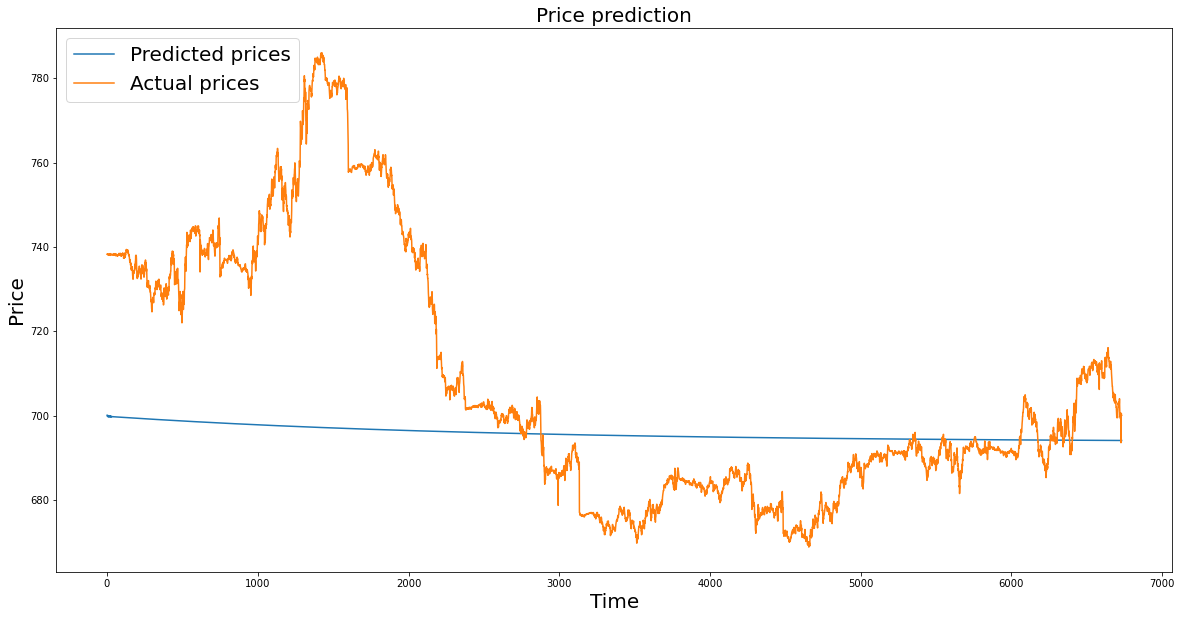

In [20]:
plt.figure(figsize=(20,10))
plt.plot(predictions, label="Predicted prices")
plt.plot(x_train, label="Actual prices")
plt.title(f'Price prediction', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.show()